# Practice #1
## З дисципліни Інтелектуальний аналіз даних
## Студента групи МІТ-31
## __Єрмакова Юрія__

--------

беремо за основу ipynb Kaggle2 з лекції 4 та здійснюємо моделювання задачі класифікації на зазначених даних, але в моделі використовуємо не більше 5 стовпчиків для X (там є 10) - які саме - необхідно вибрати на підставі попереднього аналізу даних

## Init libs

In [1]:
import random as rnd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report

# %matplotlib inline

# plt.style.use('seaborn-darkgrid')
# plt.rcParams['figure.figsize'] = (16, 8)

## Read data

In [22]:
df = pd.read_csv('practice1_data.csv')
df = df.drop(columns=['x5', 'x6', 'x7', 'x8', 'x9', 'x10'])
print(df)
print(df.describe())

            x1        x2        x3        x4  classes
0     2.163950  0.015729 -1.136593  2.182571        0
1     1.364464 -1.359741 -1.881798 -0.484231        0
2     1.237133  0.945965 -0.008633  0.889645        2
3     0.530019  2.739019  1.168152 -0.182967        1
4    -1.169403 -0.387841  0.049067 -2.136358        2
...        ...       ...       ...       ...      ...
1495 -0.146574 -3.057110 -1.292373 -1.313307        1
1496  1.436362 -0.860712 -0.236148  0.034834        3
1497  1.030032 -2.748605 -1.579382  0.594056        1
1498  1.681369 -1.353401  0.479499  0.189862        2
1499 -0.571404  0.737915 -0.347353  1.309141        3

[1500 rows x 5 columns]
                x1           x2           x3           x4      classes
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000
mean      0.550329    -0.275385    -0.383910    -0.017770     1.497333
std       1.489842     1.711574     1.390968     0.976437     1.117807
min      -4.857101    -5.631583    -4.55475

In [3]:
df["classes"].value_counts()

0    376
2    376
1    375
3    373
Name: classes, dtype: int64

In [4]:
def kdeplot(axes, data, label, hue, alpha):
    sns.kdeplot(ax=axes, data=data, x=label, hue=hue, alpha=alpha, shade=True)
    axes.set_xlabel(label)


def scatterplot(axes, data, x, y, hue):
    sns.scatterplot(ax=axes, data=data, x=x, y=y, hue=hue)
    axes.set_xlabel(x)
    axes.set_ylabel(y)


## Kdeplot

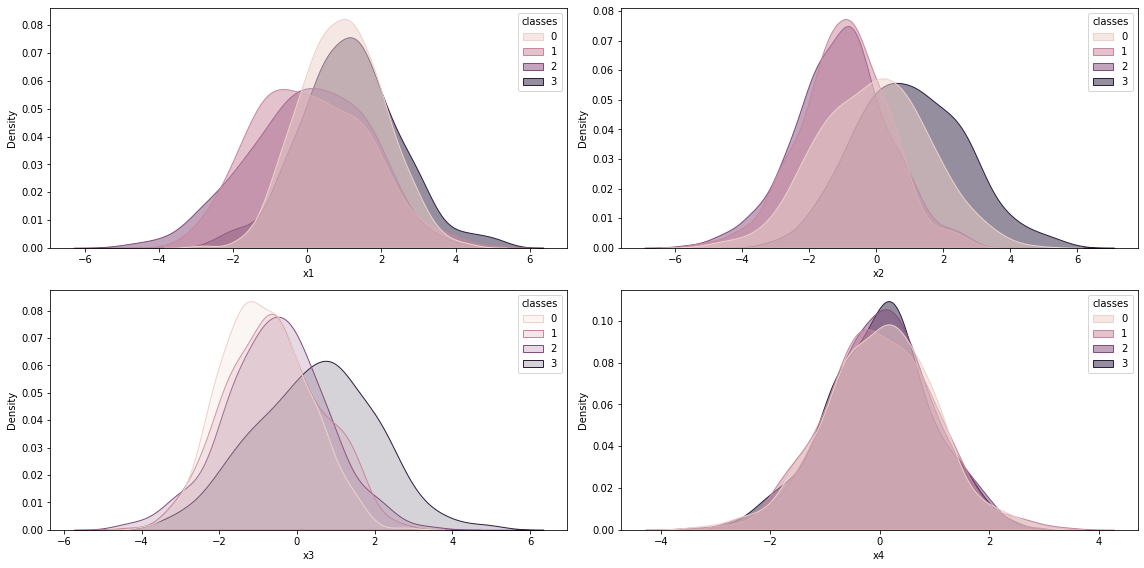

In [9]:
figure, axes = plt.subplots(2, 2, figsize=(16, 8))

kdeplot(axes[0,0], df, "x1", "classes", 0.5)
kdeplot(axes[0,1], df, "x2", "classes", 0.5)
kdeplot(axes[1,0], df, "x3", "classes", 0.2)
kdeplot(axes[1,1], df, "x4", "classes", 0.5)

plt.tight_layout()

## Scatterplot

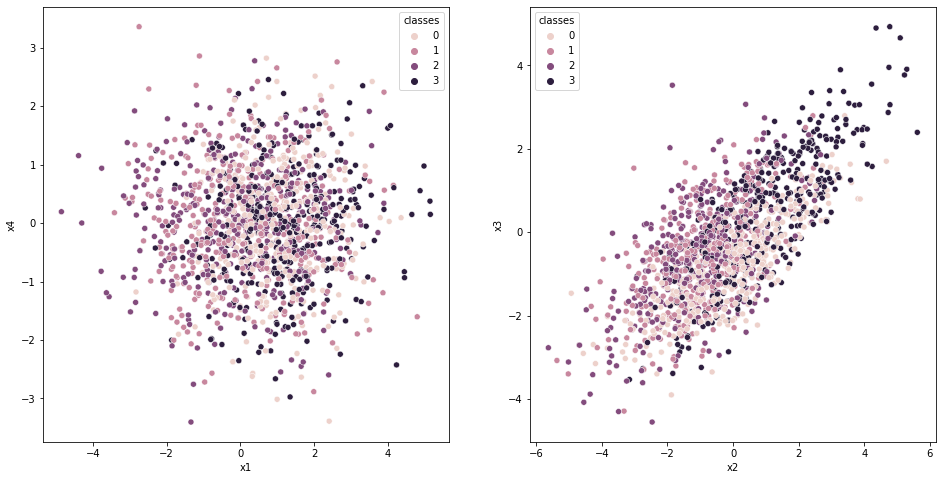

In [15]:
figure, axes = plt.subplots(1, 2, figsize=(16, 8))


scatterplot(axes[0], df, "x1", "x4", "classes")
scatterplot(axes[1], df, "x2", "x3", "classes")

## Heatmap

Text(0.5, 1.0, 'Correlation map')

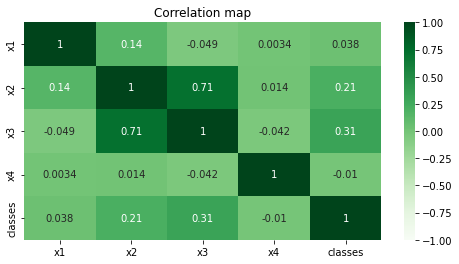

In [20]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(), cmap="Greens", vmin=-1, vmax=1, annot=True)
plt.title("Correlation map")

## Confusion matrix

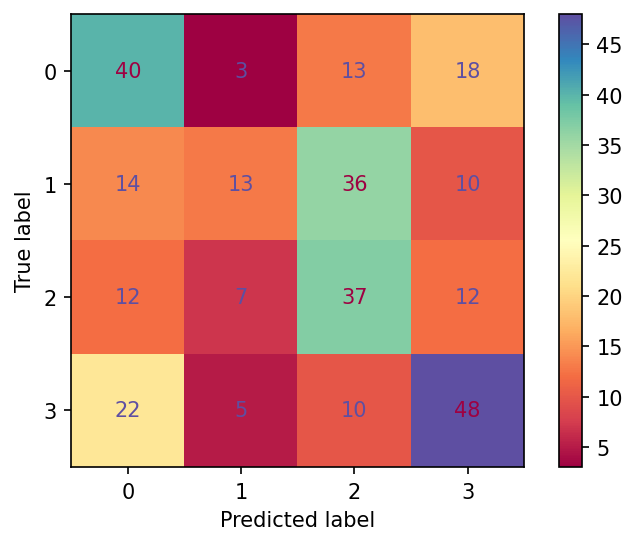

In [39]:
x = df.drop('classes', axis=1)
y = df['classes']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

scaler = StandardScaler()
log_model = LogisticRegression()

Scaled_x_train = scaler.fit_transform(x_train)
Scaled_x_test = scaler.transform(x_test)
log_model.fit(Scaled_x_train, y_train)
y_pred = log_model.predict(Scaled_x_test)

confusion_matrix(y_test, y_pred)

figure, axis = plt.subplots(dpi=150) # dpi -> resize
plot_confusion_matrix(log_model, Scaled_x_test, y_test, ax=axis, cmap='Spectral')

## Score

In [34]:
score = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.54      0.49        74
           1       0.46      0.18      0.26        73
           2       0.39      0.54      0.45        68
           3       0.55      0.56      0.55        85

    accuracy                           0.46       300
   macro avg       0.46      0.46      0.44       300
weighted avg       0.47      0.46      0.44       300

